# EDA

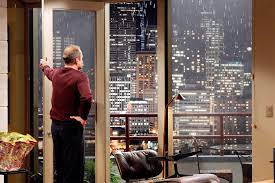

In [16]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [17]:
df = pd.read_csv('./data/King_COunty_House_prices_dataset.csv')

In [18]:
df.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.000         3      1.000         1180   
1  6414100192   12/9/2014 538000.000         3      2.250         2570   
2  5631500400   2/25/2015 180000.000         2      1.000          770   
3  2487200875   12/9/2014 604000.000         4      3.000         1960   
4  1954400510   2/18/2015 510000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650   1.000         NaN 0.000  ...      7        1180            0.0   
1      7242   2.000       0.000 0.000  ...      7        2170          400.0   
2     10000   1.000       0.000 0.000  ...      6         770            0.0   
3      5000   1.000       0.000 0.000  ...      7        1050          910.0   
4      8080   1.000       0.000 0.000  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0     1955         0.000    98178 47.511 -122.257           1340        5650  
1     1951      1991.000    98125 47.721 -122.319           1690        7639  
2     1933           NaN    98028 47.738 -122.233           2720        8062  
3     1965         0.000    98136 47.521 -122.393           1360        5000  
4     1987         0.000    98074 47.617 -122.045           1800        7503  

[5 rows x 21 columns]

In [19]:
df.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count      21597.000   21597.000 21597.000  21597.000    21597.000   
mean  4580474287.771  540296.574     3.373      2.116     2080.322   
std   2876735715.748  367368.140     0.926      0.769      918.106   
min      1000102.000   78000.000     1.000      0.500      370.000   
25%   2123049175.000  322000.000     3.000      1.750     1430.000   
50%   3904930410.000  450000.000     3.000      2.250     1910.000   
75%   7308900490.000  645000.000     4.000      2.500     2550.000   
max   9900000190.000 7700000.000    33.000      8.000    13540.000   

         sqft_lot    floors  waterfront      view  condition     grade  \
count   21597.000 21597.000   19221.000 21534.000  21597.000 21597.000   
mean    15099.409     1.494       0.008     0.234      3.410     7.658   
std     41412.637     0.540       0.087     0.766      0.651     1.173   
min       520.000     1.000       0.000     0.000      1.000     3.000   
25%      5040.000     1.000       0.000     0.000      3.000     7.000   
50%      7618.000     1.500       0.000     0.000      3.000     7.000   
75%     10685.000     2.000       0.000     0.000      4.000     8.000   
max   1651359.000     3.500       1.000     4.000      5.000    13.000   

       sqft_above  yr_built  yr_renovated   zipcode       lat      long  \
count   21597.000 21597.000     17755.000 21597.000 21597.000 21597.000   
mean     1788.597  1971.000        83.637 98077.952    47.560  -122.214   
std       827.760    29.375       399.946    53.513     0.139     0.141   
min       370.000  1900.000         0.000 98001.000    47.156  -122.519   
25%      1190.000  1951.000         0.000 98033.000    47.471  -122.328   
50%      1560.000  1975.000         0.000 98065.000    47.572  -122.231   
75%      2210.000  1997.000         0.000 98118.000    47.678  -122.125   
max      9410.000  2015.000      2015.000 98199.000    47.778  -121.315   

       sqft_living15  sqft_lot15  
count      21597.000   21597.000  
mean        1986.620   12758.284  
std          685.230   27274.442  
min          399.000     651.000  
25%         1490.000    5100.000  
50%         1840.000    7620.000  
75%         2360.000   10083.000  
max         6210.000  871200.000

In [124]:
lower_bound = df.describe().price.loc['25%']
upper_bound = df.describe().price.loc['75%']
low_priced = df[df['price'] <= lower_bound].reset_index()
middle_priced = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)].reset_index()
high_priced = df[df['price'] >= upper_bound].reset_index()
high_priced
labels = ['low_priced', 'middle_priced', 'high_priced']
print(labels)
df['price_cat'] = pd.cut(df.price, [0., lower_bound, upper_bound, df.describe().price.loc['max']], right=True, labels=labels) # category in df frame

df.eval("live_price_per_ft2 = price/sqft_living", inplace = True)
df.eval("lot_price_per_ft2 = price/sqft_lot", inplace = True)

df.dropna()

['low_priced', 'middle_priced', 'high_priced']


id        date       price  bedrooms  bathrooms  sqft_living  \
1      6414100192   12/9/2014  538000.000         3      2.250         2570   
3      2487200875   12/9/2014  604000.000         4      3.000         1960   
4      1954400510   2/18/2015  510000.000         3      2.000         1680   
5      7237550310   5/12/2014 1230000.000         4      4.500         5420   
6      1321400060   6/27/2014  257500.000         3      2.250         1715   
...           ...         ...         ...       ...        ...          ...   
21591  2997800021   2/19/2015  475000.000         3      2.500         1310   
21592   263000018   5/21/2014  360000.000         3      2.500         1530   
21593  6600060120   2/23/2015  400000.000         4      2.500         2310   
21594  1523300141   6/23/2014  402101.000         2      0.750         1020   
21596  1523300157  10/15/2014  325000.000         2      0.750         1020   

       sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  \
1          7242   2.000       0.000 0.000  ...      1951      1991.000   
3          5000   1.000       0.000 0.000  ...      1965         0.000   
4          8080   1.000       0.000 0.000  ...      1987         0.000   
5        101930   1.000       0.000 0.000  ...      2001         0.000   
6          6819   2.000       0.000 0.000  ...      1995         0.000   
...         ...     ...         ...   ...  ...       ...           ...   
21591      1294   2.000       0.000 0.000  ...      2008         0.000   
21592      1131   3.000       0.000 0.000  ...      2009         0.000   
21593      5813   2.000       0.000 0.000  ...      2014         0.000   
21594      1350   2.000       0.000 0.000  ...      2009         0.000   
21596      1076   2.000       0.000 0.000  ...      2008         0.000   

       zipcode    lat     long  sqft_living15  sqft_lot15      price_cat  \
1        98125 47.721 -122.319           1690        7639  middle_priced   
3        98136 47.521 -122.393           1360        5000  middle_priced   
4        98074 47.617 -122.045           1800        7503  middle_priced   
5        98053 47.656 -122.005           4760      101930    high_priced   
6        98003 47.310 -122.327           2238        6819     low_priced   
...        ...    ...      ...            ...         ...            ...   
21591    98116 47.577 -122.409           1330        1265  middle_priced   
21592    98103 47.699 -122.346           1530        1509  middle_priced   
21593    98146 47.511 -122.362           1830        7200  middle_priced   
21594    98144 47.594 -122.299           1020        2007  middle_priced   
21596    98144 47.594 -122.299           1020        1357  middle_priced   

       live_price_per_ft2  lot_price_per_ft2  
1                 209.339             74.289  
3                 308.163            120.800  
4                 303.571             63.119  
5                 226.937             12.067  
6                 150.146             37.762  
...                   ...                ...  
21591             362.595            367.079  
21592             235.294            318.302  
21593             173.160             68.811  
21594             394.217            297.853  
21596             318.627            302.045  

[15762 rows x 24 columns]

In [54]:
df.price_cat.head()

0       low_priced
1    middle_priced
2       low_priced
3    middle_priced
4    middle_priced
Name: price_cat, dtype: category
Categories (3, object): ['low_priced' < 'middle_priced' < 'high_priced']

## simple map with high priced houses

In [375]:
df['price_cat'] = pd.cut(df.price, [0., lower_bound, upper_bound, df.describe().price.loc['max']], right=True, labels=labels) # category in df frame

dark_col = (0, 30, 30)
middle_col = (0, 50, 70)
light_col = (0, 60, 100)
color_seq = [dark_col, middle_col, light_col]
blue_col = ['blue', 'royalblue', 'paleturquoise']
fig = px.scatter_mapbox(df, lat="lat", lon="long", color='price_cat', color_discrete_sequence=blue_col, width=800, height=500)# hover_name="City", hover_data=["State", "Population"],
                        #color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [61]:
grades = df.grade.unique().sort()

In [71]:
#us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
fig = px.scatter_mapbox(df, lat="lat", lon="long", color='grade')# hover_name="City", hover_data=["State", "Population"],
                        #color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [81]:
fig = px.density_mapbox(df, lat='lat', lon='long', z='grade', radius=2,
                        #center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [62]:
df.groupby('grade').count()

id  date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
grade                                                                          
3         1     1      1         1          1            1         1       1   
4        27    27     27        27         27           27        27      27   
5       242   242    242       242        242          242       242     242   
6      2038  2038   2038      2038       2038         2038      2038    2038   
7      8974  8974   8974      8974       8974         8974      8974    8974   
8      6065  6065   6065      6065       6065         6065      6065    6065   
9      2615  2615   2615      2615       2615         2615      2615    2615   
10     1134  1134   1134      1134       1134         1134      1134    1134   
11      399   399    399       399        399          399       399     399   
12       89    89     89        89         89           89        89      89   
13       13    13     13        13         13           13        13      13   

       waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
grade                    ...                                        
3               1     1  ...           1              1         1   
4              25    27  ...          27             27        27   
5             212   242  ...         242            242       242   
6            1810  2031  ...        2038           2038      2038   
7            7974  8948  ...        8974           8974      8974   
8            5409  6053  ...        6065           6065      6065   
9            2320  2604  ...        2615           2615      2615   
10           1018  1130  ...        1134           1134      1134   
11            357   397  ...         399            399       399   
12             82    88  ...          89             89        89   
13             13    13  ...          13             13        13   

       yr_renovated  zipcode   lat  long  sqft_living15  sqft_lot15  price_cat  
grade                                                                           
3                 1        1     1     1              1           1          1  
4                18       27    27    27             27          27         27  
5               190      242   242   242            242         242        242  
6              1681     2038  2038  2038           2038        2038       2038  
7              7362     8974  8974  8974           8974        8974       8974  
8              4985     6065  6065  6065           6065        6065       6065  
9              2176     2615  2615  2615           2615        2615       2615  
10              933     1134  1134  1134           1134        1134       1134  
11              326      399   399   399            399         399        399  
12               72       89    89    89             89          89         89  
13               11       13    13    13             13          13         13  

[11 rows x 21 columns]

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

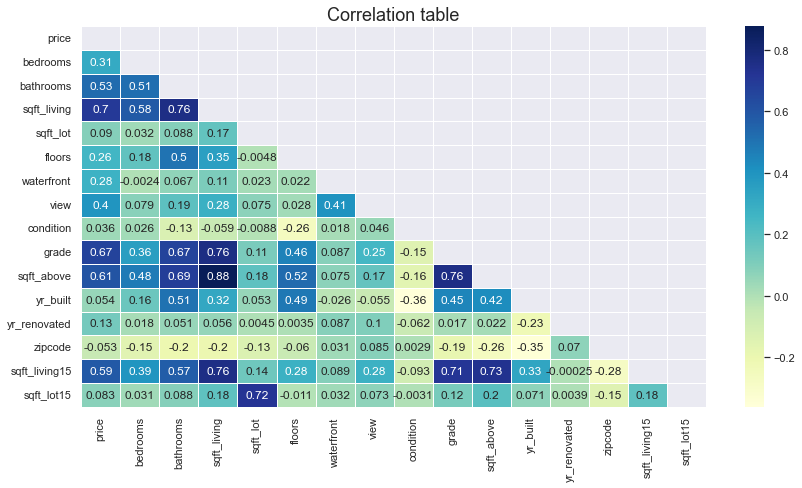

In [361]:
fig=plt.figure(figsize=(14,7))

df = pd.read_csv('./data/King_COunty_House_prices_dataset.csv')
reduced_data = df.drop(labels = ['id', 'lat', 'long'], axis=1)
matrix = np.triu(reduced_data.corr())

sns.heatmap(reduced_data.corr(), cmap='YlGnBu', annot=True, linewidth=0.6, mask=matrix)

plt.title('Correlation table', fontsize=18)
df.columns

In [370]:
def convert(x):
    try:
        float(x)
        return float(x)
    except Exception:
        return 0
df.sqft_basement = df.sqft_basement.apply(lambda x: convert(x))

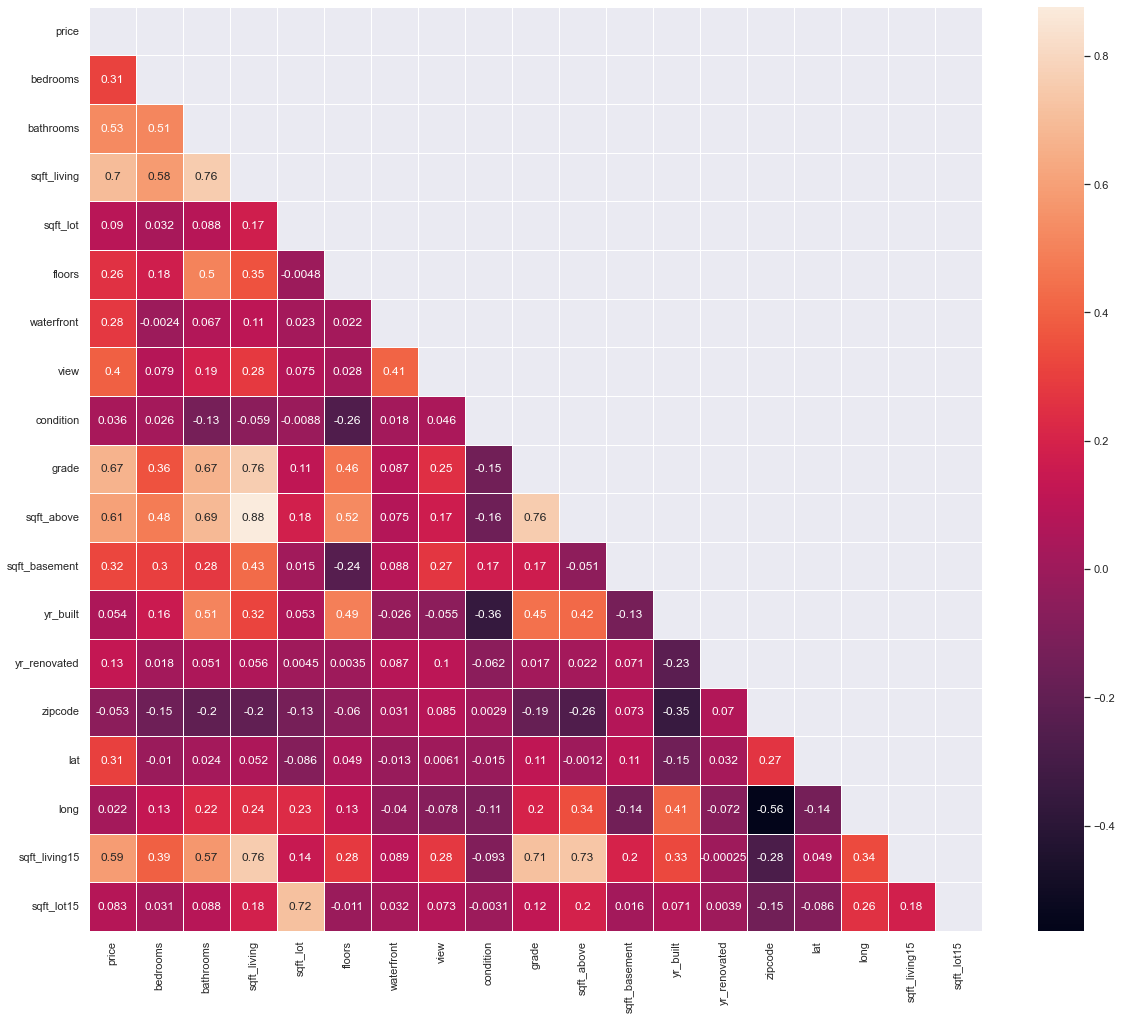

In [372]:
corr_data = df.drop(['id',], axis = 1)
plt.figure(figsize=(20, 17))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="rocket");

In [ ]:
#us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
fig = px.scatter_mapbox(df, lat="lat", lon="long", color='price_cat')# hover_name="City", hover_data=["State", "Population"],
                        #color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv')

import plotly.express as px
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='Magnitude', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

## map without low priced houses in neighbourhood

In [38]:
from geopy.distance import geodesic

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print(geodesic(coords_1, coords_2).km)

279.35290160430094


In [72]:
high_priced

index          id        date       price  bedrooms  bathrooms  \
0         5  7237550310   5/12/2014 1230000.000         4      4.500   
1        10  1736800520    4/3/2015  662500.000         3      2.500   
2        15  9297300055   1/24/2015  650000.000         4      3.000   
3        21  2524049179   8/26/2014 2000000.000         3      2.750   
4        26  1794500383   6/26/2014  937000.000         3      1.750   
...     ...         ...         ...         ...       ...        ...   
5406  21580  7502800100   8/13/2014  679950.000         5      2.750   
5407  21581   191100405   4/21/2015 1580000.000         4      3.250   
5408  21583  7202300110   9/15/2014  810000.000         4      3.000   
5409  21584   249000205  10/15/2014 1540000.000         5      3.750   
5410  21590  7936000429   3/26/2015 1010000.000         4      3.500   

      sqft_living  sqft_lot  floors  waterfront  ...  sqft_above  \
0            5420    101930   1.000       0.000  ...        3890   
1            3560      9796   1.000         NaN  ...        1860   
2            2950      5000   2.000       0.000  ...        1980   
3            3050     44867   1.000       0.000  ...        2330   
4            2450      2691   2.000       0.000  ...        1750   
...           ...       ...     ...         ...  ...         ...   
5406         3600      9437   2.000       0.000  ...        3600   
5407         3410     10125   2.000       0.000  ...        3410   
5408         3990      7838   2.000       0.000  ...        3990   
5409         4470      8088   2.000       0.000  ...        4470   
5410         3510      7200   2.000       0.000  ...        2600   

      sqft_basement  yr_built  yr_renovated zipcode    lat     long  \
0            1530.0      2001         0.000   98053 47.656 -122.005   
1            1700.0      1965         0.000   98007 47.601 -122.145   
2             970.0      1979         0.000   98126 47.571 -122.375   
3             720.0      1968         0.000   98040 47.532 -122.233   
4             700.0      1915           NaN   98119 47.639 -122.360   
...             ...       ...           ...     ...    ...      ...   
5406            0.0      2014         0.000   98059 47.482 -122.131   
5407              ?      2007           NaN   98040 47.565 -122.223   
5408            0.0      2003           NaN   98053 47.686 -122.046   
5409            0.0      2008         0.000   98004 47.632 -122.200   
5410          910.0      2009         0.000   98136 47.554 -122.398   

      sqft_living15  sqft_lot15    price_cat  
0              4760      101930  high_priced  
1              2210        8925  high_priced  
2              2140        4000  high_priced  
3              4110       20336  high_priced  
4              1760        3573  high_priced  
...             ...         ...          ...  
5406           3550        9421  high_priced  
5407           2290       10125  high_priced  
5408           3370        6814  high_priced  
5409           2780        8964  high_priced  
5410           2050        6200  high_priced  

[5411 rows x 23 columns]

In [45]:
no_scum = high_priced[(geodesic((high_priced['lat'], high_priced['long']), (low_priced['lat'], low_priced['long'])).km < 10).any()]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [3]:
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [68]:
def get_first_number(x):
    x = x.split('-')[0]
    x = x.replace(']','').replace('(', '').replace(',', '').replace('>', '').replace('$', '').lstrip()
    return int(x)

def get_avg(interval):
    return (interval.right - interval.left)/2

In [74]:
# get minimum and maximum prize
#df.groupby('price').count()
#df.groupby('price').price.sum().reset_index().
new_df = df
new_df['price_range'] = pd.qcut(df['price'],10)
nr_in_range = new_df.groupby('price_range').count().id.reset_index()
nr_in_range['mean_price'] = nr_in_range['price_range'].apply(lambda x: get_avg(x))#.astype(str).str.replace('(','').replace(']','')#.split('-')[0]#.apply(lambda x: get_first_number(x))
#type(nr_in_range['price_range'])
nr_in_range

price_range    id  mean_price
0  (77999.999, 245000.0]  2164   83500.000
1   (245000.0, 298910.0]  2156   26955.000
2   (298910.0, 345000.0]  2167   23045.000
3   (345000.0, 399897.0]  2152   27448.500
4   (399897.0, 450000.0]  2212   25051.500
5   (450000.0, 519000.0]  2112   34500.000
6   (519000.0, 595000.0]  2190   38000.000
7   (595000.0, 700436.0]  2124   52718.000
8   (700436.0, 887000.0]  2161   93282.000
9  (887000.0, 7700000.0]  2159 3406500.000

<AxesSubplot:xlabel='mean_price', ylabel='id'>

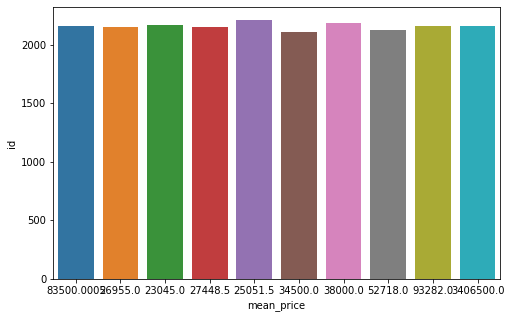

In [75]:
sns.barplot(data=nr_in_range, x='mean_price', y='id')

## relation between time and price

In [100]:
int(low_priced.date.iloc[3].split('/')[2])

2015

In [120]:
from datetime import datetime
low2 = pd.to_datetime(low_priced.date).dt.year
low2
#low2 = datetime.strftime(low_priced.date)#.apply(lambda t: strftime(t))

0       2014
1       2015
2       2014
3       2015
4       2015
        ... 
5401    2014
5402    2014
5403    2014
5404    2014
5405    2014
Name: date, Length: 5406, dtype: int64

In [142]:
low_priced2 = low_priced
low_priced2['month_sold'] = pd.to_datetime(low_priced.date).dt.month
low_priced2['year_sold'] = pd.to_datetime(low_priced.date).dt.year
lowplot = low_priced2.groupby(['year_sold', 'month_sold']).mean().price

middle_priced2 = middle_priced
middle_priced2['month_sold'] = pd.to_datetime(middle_priced.date).dt.month
middle_priced2['year_sold'] = pd.to_datetime(middle_priced.date).dt.year
middleplot = middle_priced2.groupby(['year_sold', 'month_sold']).mean().price

high_priced2 = high_priced
high_priced2['month_sold'] = pd.to_datetime(high_priced.date).dt.month
high_priced2['year_sold'] = pd.to_datetime(high_priced.date).dt.year
highplot = high_priced2.groupby(['year_sold', 'month_sold']).mean().price
middleplot

year_sold  month_sold
2014       5            465345.359
           6            463741.790
           7            466717.951
           8            456040.881
           9            462403.671
           10           461359.740
           11           457769.514
           12           453808.109
2015       1            458395.077
           2            461815.148
           3            461237.133
           4            464865.110
           5            462095.789
Name: price, dtype: float64

In [138]:
hightimes = []
for i in range(5,13):
    hightimes.append(str(i)+'/2014')
for i in range(1,6):
    hightimes.append(str(i)+'/2015')

TypeError: _set_ticklabels() missing 1 required positional argument: 'labels'

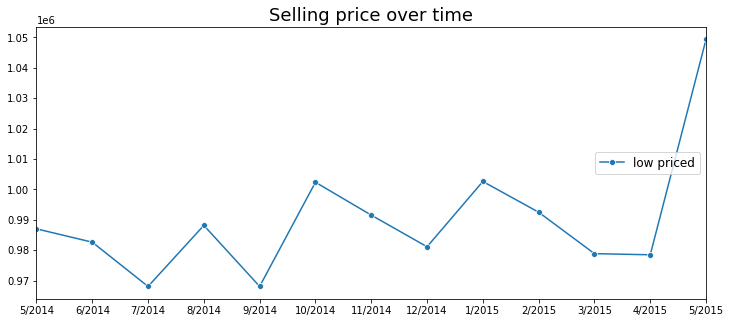

In [211]:
fig = plt.figure(figsize=(12,5))
#plt.yscale("log")
#axl = sns.lineplot(hightimes, lowplot.to_numpy(), marker = 'o')
#sns.lineplot(hightimes, middleplot.to_numpy(), marker = 'o')
axl=sns.lineplot(hightimes, highplot.to_numpy(), marker = 'o')
#axl.set(ylim=(200000,1200000))
axl.set(xlim=('5/2014','5/2015'))
#axl.set_yticklabels(['200k', '400k', '600k', '800k', '1M', '1.2M'])
axl.legend(['low priced', 'middle priced', 'high priced'], loc='center right', fontsize=12)
axl.set_title('Selling price over time', fontsize=18)
axl.set_xticklabels()
#plt.yscale("log")
;


## joined bar and line plot

In [457]:
high_priced.head()

index          id     date       price  bedrooms  bathrooms  sqft_living  \
0      5  7237550310  2014-05 1230000.000         4      4.500         5420   
1     10  1736800520  2015-04  662500.000         3      2.500         3560   
2     15  9297300055  2015-01  650000.000         4      3.000         2950   
3     21  2524049179  2014-08 2000000.000         3      2.750         3050   
4     26  1794500383  2014-06  937000.000         3      1.750         2450   

   sqft_lot  floors  waterfront  ...  yr_built  yr_renovated  zipcode    lat  \
0    101930   1.000       0.000  ...      2001         0.000    98053 47.656   
1      9796   1.000         NaN  ...      1965         0.000    98007 47.601   
2      5000   2.000       0.000  ...      1979         0.000    98126 47.571   
3     44867   1.000       0.000  ...      1968         0.000    98040 47.532   
4      2691   2.000       0.000  ...      1915           NaN    98119 47.639   

      long  sqft_living15  sqft_lot15  renovated  decade_renovated  \
0 -122.005           4760      101930      False               NaN   
1 -122.145           2210        8925      False               NaN   
2 -122.375           2140        4000      False               NaN   
3 -122.233           4110       20336      False               NaN   
4 -122.360           1760        3573      False               NaN   

   decade_built  
0          2000  
1          1960  
2          1970  
3          1960  
4          1910  

[5 rows x 25 columns]

In [456]:
df2 = high_priced
df2['date'] = pd.to_datetime(df2.date)
df2['date'] = df2['date'].dt.to_period('M')
df2['date'] = df2['date'].astype(str)

In [459]:
df_3 = df2.groupby("date").agg({"date":"size","price":"sum"})
df_3.rename(columns={"date": "count"}, inplace = True)
df_3.reset_index(inplace=True)

In [460]:
df_3.date.unique()

array(['2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10',
       '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04',
       '2015-05'], dtype=object)

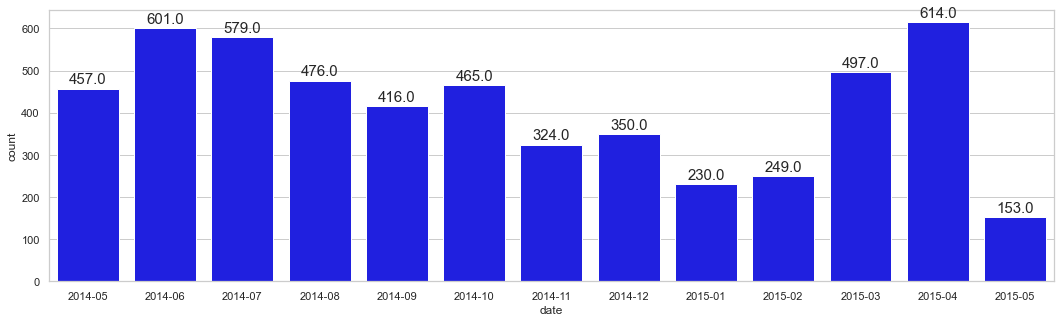

In [461]:
plt.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))

splot=sns.barplot( data=df_3,x='date', y='count', palette =['orangered' if (int(y)<40) else 'blue' for y in df_3['count'] ] )
#for p in splot.patches:
#    splot.annotate(format(p.get_height(), '.1f'), 
#                   (p.get_x() + p.get_width() / 2., p.get_height()), 
#                   ha = 'center', va = 'center', size=15,
#                   xytext = (0, 9), 
#                   textcoords = 'offset points')

In [ ]:
plt.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = df3['y_var_1'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = df3, x='x_var', y='y_var_2', alpha=0.5, ax=ax2)

In [441]:
hightimes

['5/2014',
 '6/2014',
 '7/2014',
 '8/2014',
 '9/2014',
 '10/2014',
 '11/2014',
 '12/2014',
 '1/2015',
 '2/2015',
 '3/2015',
 '4/2015',
 '5/2015']

In [442]:
highplot

year_sold  month_sold
2014       5             987011.201
           6             982624.386
           7             968066.427
           8             988149.015
           9             968077.058
           10           1002336.269
           11            991521.383
           12            981119.871
2015       1            1002586.400
           2             992479.028
           3             978853.149
           4             978476.311
           5            1049326.307
Name: price, dtype: float64

In [448]:
plotdata = high_priced

In [449]:
plotdata.info

<bound method DataFrame.info of       index          id        date       price  bedrooms  bathrooms  \
0         5  7237550310   5/12/2014 1230000.000         4      4.500   
1        10  1736800520    4/3/2015  662500.000         3      2.500   
2        15  9297300055   1/24/2015  650000.000         4      3.000   
3        21  2524049179   8/26/2014 2000000.000         3      2.750   
4        26  1794500383   6/26/2014  937000.000         3      1.750   
...     ...         ...         ...         ...       ...        ...   
5406  21580  7502800100   8/13/2014  679950.000         5      2.750   
5407  21581   191100405   4/21/2015 1580000.000         4      3.250   
5408  21583  7202300110   9/15/2014  810000.000         4      3.000   
5409  21584   249000205  10/15/2014 1540000.000         5      3.750   
5410  21590  7936000429   3/26/2015 1010000.000         4      3.500   

      sqft_living  sqft_lot  floors  waterfront  ...  yr_built  yr_renovated  \
0            5420    10

ValueError: could not convert string to float: '5/12/2014'

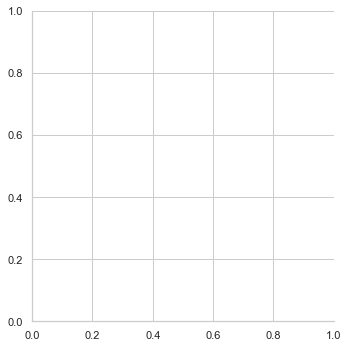

In [450]:
ax=sns.lmplot(x='date', y='price', data=plotdata)

In [217]:
high_priced.columns

Index(['index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_cat',
       'live_price_per_ft2', 'lot_price_per_ft2', 'month_sold', 'year_sold'],
      dtype='object')

<AxesSubplot:xlabel='date', ylabel='price'>

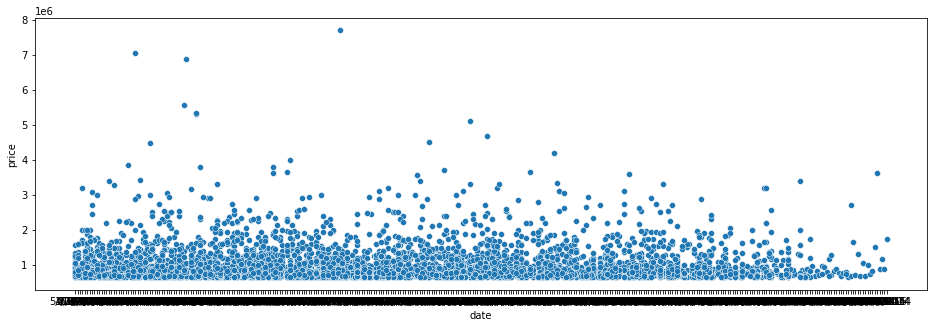

In [214]:
fig = plt.figure(figsize=(16,5))]
sns.scatterplot(high_priced.date.sort_values(), high_priced.price)

In [169]:
df.yr_renovated.head()

0      0.000
1   1991.000
2        NaN
3      0.000
4      0.000
Name: yr_renovated, dtype: float64

In [174]:
df.yr_built.max()

2015

In [196]:
tempdf4 = low_priced.groupby('yr_built').mean()
tempdf4_1 = tempdf4[tempdf4['yr_renovated'] >=5]
tempdf4_2 = tempdf4[tempdf4['yr_renovated'] < 5]
tempdf5 = middle_priced.groupby('yr_built').mean()
tempdf5_1 = tempdf5[tempdf5['yr_renovated'] >=5]
tempdf5_2 = tempdf5[tempdf5['yr_renovated'] < 5]
tempdf6 = high_priced.groupby('yr_built').mean()
tempdf6_1 = tempdf6[tempdf6['yr_renovated'] >=5]
tempdf6_2 = tempdf6[tempdf6['yr_renovated'] < 5]

#tempdf5_1 = middle_priced.groupby('yr_built').mean()
#tempdf5_2 = middle_priced.groupby('yr_built').mean()
#tempdf6_1 = high_priced.groupby('yr_built').mean()
#tempdf6_2 = high_priced.groupby('yr_built').mean()
#for j in range(1900, 2016):
#    if j not in df.yr_built:
#        print(j+' not included')
#tempdf4

In [178]:
low_priced3 = low_priced.sort_values('yr_built')
low_priced3

index          id        date      price  bedrooms  bathrooms  \
3031  11522  3365900520   6/18/2014 192500.000         3      1.000   
3708  14069  3521059042   7/28/2014 255500.000         4      1.000   
1021   3915  7883604065    5/1/2015 210000.000         2      1.000   
5072  19370  2420069042   4/24/2015 240000.000         3      2.000   
1016   3878  7129302095   2/13/2015 265000.000         3      1.000   
...     ...         ...         ...        ...       ...        ...   
5282  20664   301400240   9/22/2014 282900.000         4      2.500   
5355  21113  2895800780    4/1/2015 279800.000         3      1.750   
5314  20890  3355400242  10/28/2014 274900.000         3      2.000   
5405  21586   844000965   6/26/2014 224000.000         3      1.750   
5325  20947  6058600220   7/31/2014 230000.000         3      1.500   

      sqft_living  sqft_lot  floors  waterfront  ...  zipcode    lat     long  \
3031         1080      8580   1.500       0.000  ...    98168 47.472 -122.262   
3708         1370     41194   1.500       0.000  ...    98092 47.272 -122.144   
1021         1100      6000   1.500         NaN  ...    98108 47.528 -122.323   
5072         1553      6550   1.000         NaN  ...    98022 47.206 -121.994   
1016         1122      6554   1.500       0.000  ...    98118 47.514 -122.257   
...           ...       ...     ...         ...  ...      ...    ...      ...   
5282         1710      3500   2.000       0.000  ...    98002 47.345 -122.217   
5355         1410      2052   2.000       0.000  ...    98106 47.517 -122.347   
5314         1936      6612   2.000       0.000  ...    98001 47.260 -122.246   
5405         1500     11968   1.000         NaN  ...    98010 47.309 -122.002   
5325         1040      1264   2.000       0.000  ...    98144 47.595 -122.301   

      sqft_living15 sqft_lot15   price_cat  live_price_per_ft2  \
3031           1800      12672  low_priced             178.241   
3708           1590      84070  low_priced             186.496   
1021           1280       6000  low_priced             190.909   
5072           1010      10546  low_priced             154.540   
1016           1610       5650  low_priced             236.185   
...             ...        ...         ...                 ...   
5282           1710       3500  low_priced             165.439   
5355           1410       1988  low_priced             198.440   
5314           1620      21600  low_priced             141.994   
5405           1320      11303  low_priced             149.333   
5325           1350       3000  low_priced             221.154   

      lot_price_per_ft2  month_sold  year_sold  
3031             22.436           6       2014  
3708              6.202           7       2014  
1021             35.000           5       2015  
5072             36.641           4       2015  
1016             40.433           2       2015  
...                 ...         ...        ...  
5282             80.829           9       2014  
5355            136.355           4       2015  
5314             41.576          10       2014  
5405             18.717           6       2014  
5325            181.962           7       2014  

[5406 rows x 27 columns]

## scatter plot for high priced houses dependent on renovation

## what to do abut the renovations?

               id                 date      price  bedrooms  bathrooms  \
0      7129300520  2014-10-13 00:00:00 221900.000         3      1.000   
1      6414100192  2014-12-09 00:00:00 538000.000         3      2.250   
2      5631500400  2015-02-25 00:00:00 180000.000         2      1.000   
3      2487200875  2014-12-09 00:00:00 604000.000         4      3.000   
4      1954400510  2015-02-18 00:00:00 510000.000         3      2.000   
...           ...                  ...        ...       ...        ...   
21592   263000018  2014-05-21 00:00:00 360000.000         3      2.500   
21593  6600060120  2015-02-23 00:00:00 400000.000         4      2.500   
21594  1523300141  2014-06-23 00:00:00 402101.000         2      0.750   
21595   291310100  2015-01-16 00:00:00 400000.000         3      2.500   
21596           1                    1      1.000         1      1.000   

       sqft_living  sqft_lot  floors  waterfront  view  ...  yr_built  \
0             1180      5650   1.000  

TypeError: '<' not supported between instances of 'int' and 'str'

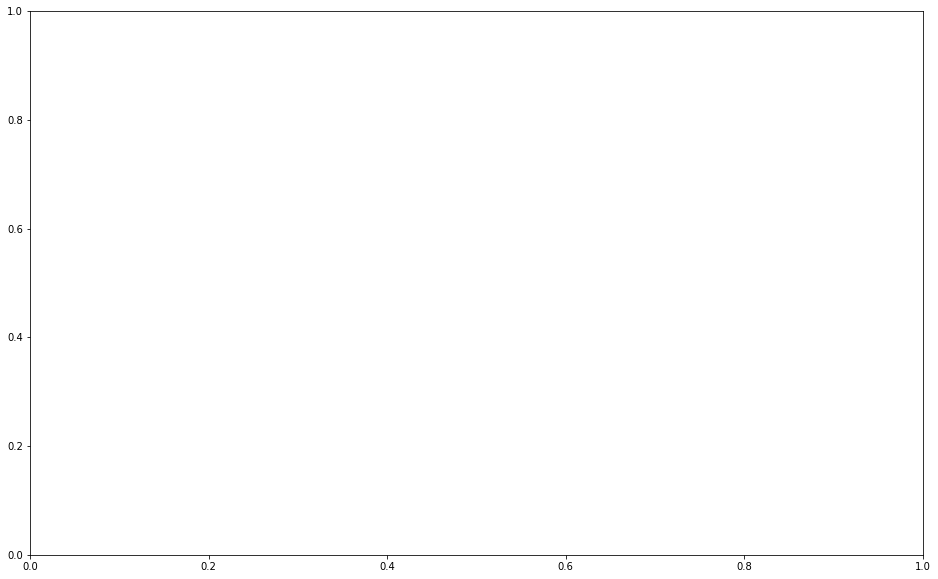

In [228]:
#from numpy import median
data_f = pd.read_csv('./data/King_County_House_prices_dataset.csv', parse_dates=[1])
data_f['sqft_price'] = data_f['price'] / data_f['sqft_living']
data_f['year_month']= data_f['date'].dt.strftime('%Y-%m')

data_f['date_cat'] = data_f['date']
for i in range(data_f.shape[0]):
    data_f.date_cat.iloc[i] = 0
data_f.iloc[data_f.date_cat.shape[0]-1]=1
print(data_f)

#TODO set different color to the last bar
fig, ax = plt.subplots(figsize=(16,10))
# set last bar with an other color:

rank = data_f.sqft_price.argsort().argsort()
pal = sns.color_palette("Blues_d", len(data_f.sqft_price))
palette=np.array(pal[::-1])[rank]
#type(np.array(pal[::-1])[rank])

colors = ["#FF0B04", "#4374B3"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

sns.barplot(x='year_month', y='sqft_price', data=data_f.sort_values('year_month', ascending=True),
            #hue='weather'
            estimator=np.median,
            color='lightblue',
            hue='date_cat'
            #palette=np.array(pal[::-1])[rank] # set last bar with an other color:
            #palette=['grey' if (y<max('year_month')) else 'red' for y in 'year_month' ]
            #hue=
            )

#ax = sns.barplot(objects, y_pos, palette=np.array(pal[::1])[rank])


plt.xlabel('Date', fontsize=15)
plt.ylabel('Sqft Price', fontsize=15)
plt.title('Square feet Price by Year', fontsize=20)
plt.legend(loc='upper left', fontsize=13)
plt.ylim(150)
plt.show();

In [ ]:
# Create an array with the colors you want to use
colors = ["#FF0B04", "#4374B3"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# And then, from here onwards, it's exactly like the previous example
# Plot the data, specifying a different color for data points in
# each of the day categories (weekday and weekend)
ax = sns.scatterplot(x='day', y='miles_walked', data=dataset, hue='day_category')
# Customize the axes and title
ax.set_title("Miles walked")
ax.set_xlabel("day")
ax.set_ylabel("total miles")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## scatter plot with regression

In [229]:
high_priced.head()

index          id       date       price  bedrooms  bathrooms  sqft_living  \
0      5  7237550310  5/12/2014 1230000.000         4      4.500         5420   
1     10  1736800520   4/3/2015  662500.000         3      2.500         3560   
2     15  9297300055  1/24/2015  650000.000         4      3.000         2950   
3     21  2524049179  8/26/2014 2000000.000         3      2.750         3050   
4     26  1794500383  6/26/2014  937000.000         3      1.750         2450   

   sqft_lot  floors  waterfront  ...  zipcode    lat     long  sqft_living15  \
0    101930   1.000       0.000  ...    98053 47.656 -122.005           4760   
1      9796   1.000         NaN  ...    98007 47.601 -122.145           2210   
2      5000   2.000       0.000  ...    98126 47.571 -122.375           2140   
3     44867   1.000       0.000  ...    98040 47.532 -122.233           4110   
4      2691   2.000       0.000  ...    98119 47.639 -122.360           1760   

  sqft_lot15    price_cat  live_price_per_ft2  lot_price_per_ft2  month_sold  \
0     101930  high_priced             226.937             12.067           5   
1       8925  high_priced             186.096             67.630           4   
2       4000  high_priced             220.339            130.000           1   
3      20336  high_priced             655.738             44.576           8   
4       3573  high_priced             382.449            348.198           6   

   year_sold  
0       2014  
1       2015  
2       2015  
3       2014  
4       2014  

[5 rows x 27 columns]

ModuleNotFoundError: No module named 'statsmodels'

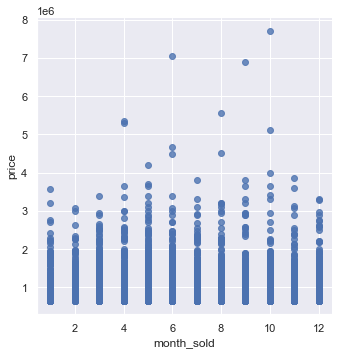

In [233]:
sns.set_theme(style="darkgrid")

# Load the example Titanic dataset
#df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
#pal = dict(male="#6495ED", female="#F08080")

# Show the survival probability as a function of age and sex
g = sns.lmplot(x="month_sold", y="price", data=high_priced, logistic=True)
               #palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

## barplot with renovation

In [251]:
df = pd.read_csv('./data/King_COunty_House_prices_dataset.csv')
high_priced = df[df['price'] >= upper_bound].reset_index()
high_priced.groupby('yr_renovated').count().head()

index    id  date  price  bedrooms  bathrooms  sqft_living  \
yr_renovated                                                               
0.000          4098  4098  4098   4098      4098       4098         4098   
1954.000          1     1     1      1         1          1            1   
1956.000          2     2     2      2         2          2            2   
1958.000          1     1     1      1         1          1            1   
1962.000          1     1     1      1         1          1            1   

              sqft_lot  floors  waterfront  ...  condition  grade  sqft_above  \
yr_renovated                                ...                                 
0.000             4098    4098        3650  ...       4098   4098        4098   
1954.000             1       1           1  ...          1      1           1   
1956.000             2       2           2  ...          2      2           2   
1958.000             1       1           1  ...          1      1           1   
1962.000             1       1           1  ...          1      1           1   

              sqft_basement  yr_built  zipcode   lat  long  sqft_living15  \
yr_renovated                                                                
0.000                  4098      4098     4098  4098  4098           4098   
1954.000                  1         1        1     1     1              1   
1956.000                  2         2        2     2     2              2   
1958.000                  1         1        1     1     1              1   
1962.000                  1         1        1     1     1              1   

              sqft_lot15  
yr_renovated              
0.000               4098  
1954.000               1  
1956.000               2  
1958.000               1  
1962.000               1  

[5 rows x 21 columns]

In [280]:
def conv_year(year):
    try:
        int(year)
        return int(year)
    except Exception:
        return 9000
print(high_priced.shape[0])
#print(high_priced)
high_priced_ren = high_priced.query('yr_renovated != 0').dropna(axis=0, subset=['yr_renovated'])
high_priced_ren.sort_values('yr_renovated', inplace=True)
high_priced_ren['yr_renovated'] = high_priced_ren.yr_renovated.apply(lambda y: int(y))
high_priced_ren.groupby('yr_renovated').mean()
#high_priced_ren.yr_renovated.unique()

5411


array([1954, 1956, 1958, 1962, 1963, 1965, 1968, 1969, 1970, 1974, 1975,
       1977, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

alle: 5411, ohne 0: 1313, ohne NaN: 4451, ohne beides: 353

In [291]:
high_priced_ren[high_priced_ren['yr_renovated']==1987]

index          id        date       price  bedrooms  bathrooms  \
4146  16930  3880900170    8/5/2014 2300000.000         4      2.500   
3744  15247  6908200006   9/19/2014  699000.000         3      2.000   
4438  18185  3625059152  12/30/2014 3300000.000         3      3.250   
3403  13953  6102400166    9/5/2014  649000.000         3      2.000   
3967  16193  7443000480    5/7/2015  865000.000         4      2.000   
1824   7245  6762700020  10/13/2014 7700000.000         6      8.000   
381    1570  1245001820   4/29/2015  776500.000         4      1.500   
2112   8580  7284900405   7/14/2014  775000.000         4      2.500   

      sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
4146         3280      7100   2.000       0.000  ...     10        2180   
3744         1820      4080   2.000       0.000  ...      8        1820   
4438         4220     41300   1.000       1.000  ...     11        2460   
3403         1810     17006   2.000         NaN  ...      8        1810   
3967         2750      5527   2.000       0.000  ...      8        2130   
1824        12050     27600   2.500       0.000  ...     13        8570   
381          2290     10372   1.000       0.000  ...      7        1510   
2112         2880      8400   2.000       0.000  ...      8        2050   

      sqft_basement  yr_built yr_renovated  zipcode    lat     long  \
4146         1100.0      1911         1987    98119 47.629 -122.362   
3744            0.0      1937         1987    98107 47.673 -122.401   
4438         1760.0      1958         1987    98008 47.608 -122.110   
3403            0.0      1913         1987    98166 47.466 -122.369   
3967          620.0      1901         1987    98119 47.651 -122.368   
1824         3480.0      1910         1987    98102 47.630 -122.323   
381           780.0      1965         1987    98033 47.689 -122.199   
2112          830.0      1955         1987    98177 47.770 -122.386   

      sqft_living15  sqft_lot15  
4146           3240        6674  
3744           2160        5400  
4438           3810       30401  
3403           2180       24911  
3967           1290        1764  
1824           3940        8800  
381            1900        8109  
2112           2880        7440  

[8 rows x 22 columns]

[Text(0, 0.0, '0'),
 Text(0, 500000.0, '0.5'),
 Text(0, 1000000.0, '1'),
 Text(0, 1500000.0, '1.5'),
 Text(0, 2000000.0, '2'),
 Text(0, 2500000.0, '2.5'),
 Text(0, 3000000.0, '3'),
 Text(0, 3500000.0, '3.5'),
 Text(0, 4000000.0, '4'),
 Text(0, 4500000.0, '')]

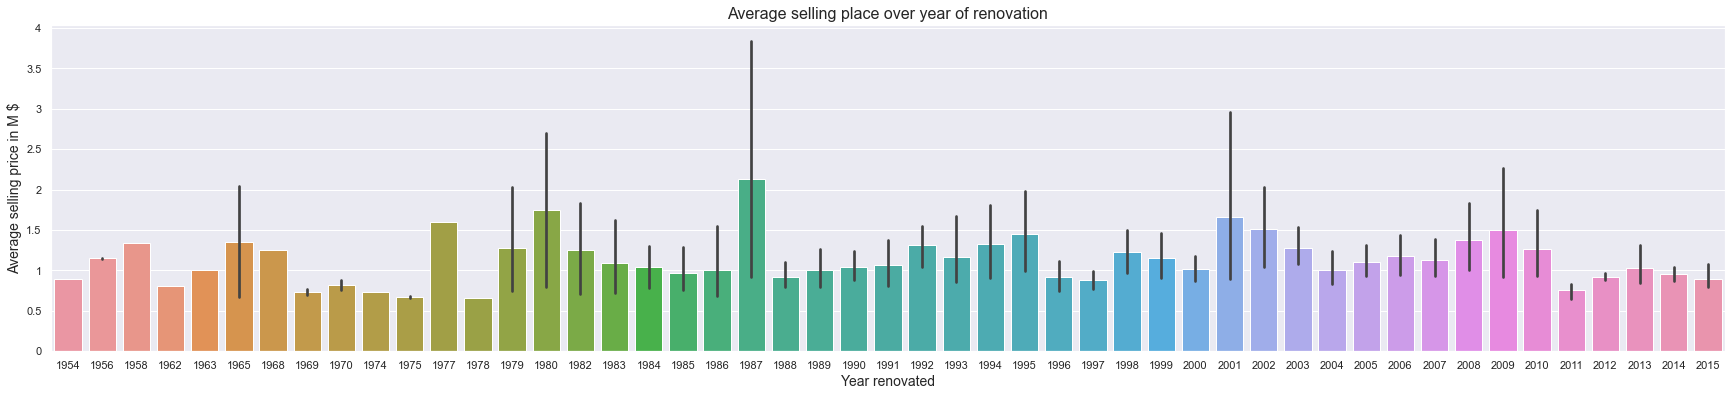

In [302]:

fig = plt.figure(figsize=(30,6))
ax = sns.barplot(x='yr_renovated', y='price', data=high_priced_ren)
ax.set_xlabel('Year renovated', fontsize=14)
ax.set_ylabel('Average selling price in M $', fontsize=14)
ax.set_title('Average selling place over year of renovation', fontsize=16)
#ax.set_yticks([0, 1000000])
ax.set_yticklabels(['0', '0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4'])
#print(4.0e6)

## interpret NaN and 0 as not renovated

In [338]:
def filter(x, frame1):
    if x in frame1.yr_renovated:
        return True
    else:
        return False
high_priced_unren = high_priced[~high_priced.yr_renovated.isin(high_priced_ren.yr_renovated)]
high_priced_new = high_priced
high_priced_new['renovated'] = high_priced.yr_renovated.apply(lambda y: filter(y, high_priced_ren))

In [341]:
cut_labels = np.arange(1900, 2020, 10)
cut_bins = np.arange(1900, 2021, 10)
print(len(cut_labels), len(cut_bins))
high_priced_new['yr_built'] = high_priced_new.yr_built.apply(lambda y: int(y))
high_priced_new['decade_built'] = pd.cut(high_priced_new.yr_built, bins=cut_bins, labels=cut_labels)
#high_priced_new
#type(high_priced_new['yr_renovated'].iloc[5])
#print(int(3.4))

12 13


In [345]:
high_priced_new.groupby('decade_built').mean()

index             id       price  bedrooms  bathrooms  \
decade_built                                                             
1900          9871.726 4360150715.135 1021440.000     3.802      2.306   
1910         10109.340 5154738328.698  926669.609     3.855      2.205   
1920          9358.543 4842195888.188  962918.859     3.658      2.242   
1930          9906.278 4202027203.670 1109487.949     3.608      2.423   
1940         10134.269 4305286354.743  941435.321     3.369      2.141   
1950         10080.652 4287991908.894  945514.147     3.683      2.243   
1960          9651.052 4677885471.920  978262.575     4.104      2.485   
1970          9885.344 4590173490.738  934835.340     3.929      2.646   
1980          9841.660 4436367100.782  955553.252     3.763      2.755   
1990          9918.582 4225813159.237  997914.175     3.803      2.936   
2000         12571.155 4613469215.629 1040800.093     3.918      3.129   
2010         17694.775 4453901641.436  990939.598     3.993      3.066   

              sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
decade_built                                                   ...          
1900             2540.345  5608.690   1.843       0.004 0.398  ...  8.143   
1910             2381.949 14396.638   1.640       0.020 0.543  ...  7.766   
1920             2426.619  8642.692   1.633       0.029 0.651  ...  8.010   
1930             2690.659 10836.545   1.568       0.076 1.080  ...  8.295   
1940             2404.552 10308.679   1.299       0.034 1.045  ...  7.754   
1950             2491.675 12622.771   1.158       0.051 0.959  ...  8.035   
1960             2832.759 17142.149   1.266       0.031 0.783  ...  8.415   
1970             2952.310 26869.611   1.485       0.039 0.789  ...  8.712   
1980             3223.367 30771.473   1.866       0.023 0.515  ...  9.520   
1990             3424.672 38891.759   1.957       0.021 0.579  ...  9.741   
2000             3509.562 27820.809   1.996       0.014 0.434  ...  9.453   
2010             3178.446  8831.646   2.086       0.005 0.254  ...  9.138   

              sqft_above  yr_built  yr_renovated   zipcode    lat     long  \
decade_built                                                                 
1900            2066.020  1906.845       395.773 98113.496 47.632 -122.328   
1910            1854.970  1915.323       399.711 98112.991 47.629 -122.327   
1920            1879.386  1925.718       347.170 98115.324 47.640 -122.324   
1930            1994.807  1936.523       423.532 98130.972 47.648 -122.328   
1940            1738.433  1946.101       489.884 98111.164 47.643 -122.305   
1950            1841.656  1955.192       327.839 98080.489 47.622 -122.271   
1960            2090.744  1965.418       207.119 98051.067 47.607 -122.218   
1970            2271.006  1976.348       109.521 98045.886 47.605 -122.183   
1980            2916.739  1986.539        32.904 98053.887 47.627 -122.135   
1990            3154.779  1995.931         7.065 98057.499 47.607 -122.114   
2000            3177.520  2004.982         2.364 98060.250 47.608 -122.123   
2010            2916.169  2013.390         0.000 98070.971 47.626 -122.184   

              sqft_living15  sqft_lot15  renovated  
decade_built                                        
1900               2060.798    4983.762      0.004  
1910               2029.319    7667.506      0.004  
1920               2136.125    6572.167      0.010  
1930               2369.824    8385.903      0.017  
1940               2213.366    9257.761      0.007  
1950               2387.930   10877.092      0.002  
1960               2610.552   13405.012      0.002  
1970               2693.286   20005.019      0.004  
1980               2955.477   24294.789      0.000  
1990               2983.496   28744.277      0.001  
2000               2856.767   20177.793      0.000  
2010               2629.695    8791.743      0.000  

[12 rows x 21 columns]

''

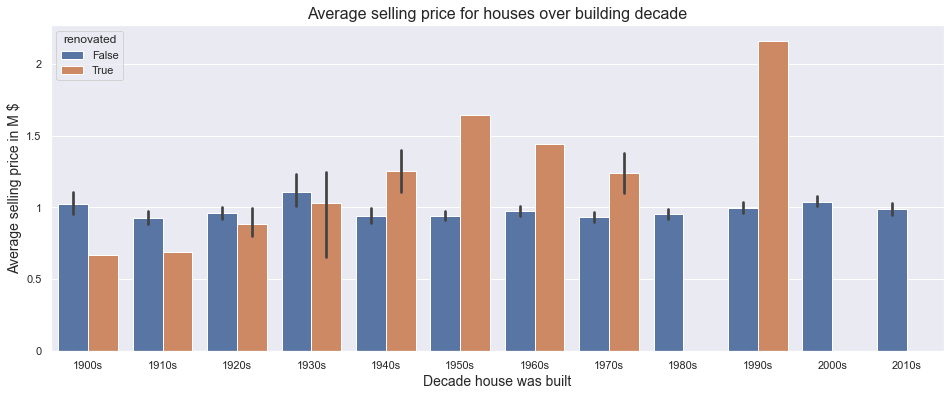

In [427]:
fig = plt.figure(figsize=(16,6))

ax=sns.barplot(x='decade_built', y='price', hue='renovated', data=high_priced_new)

ax.set_xlabel('Decade house was built', fontsize=14)
ax.set_ylabel('Average selling price in M $', fontsize=14)
ax.set_title('Average selling price for houses over building decade', fontsize=16)
ax.set_yticklabels(['0', '0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4'])
ax.set_xticklabels(['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])
#plt.legend(loc='upper left', labels=['unrenovated', 'renovated'])
;


In [376]:
print(len(low_priced), len(middle_priced), len(high_priced))

5406 10780 5411


In [383]:
print(high_priced.price.max())

7700000.0


## bar plot for number of renovated houses for certain years

In [385]:
high_priced_ren = high_priced.query('yr_renovated != 0').dropna(axis=0, subset=['yr_renovated'])
high_priced_ren.sort_values('yr_renovated', inplace=True)
high_priced_ren['yr_renovated'] = high_priced_ren.yr_renovated.apply(lambda y: int(y));

<Figure size 7560x360 with 0 Axes>

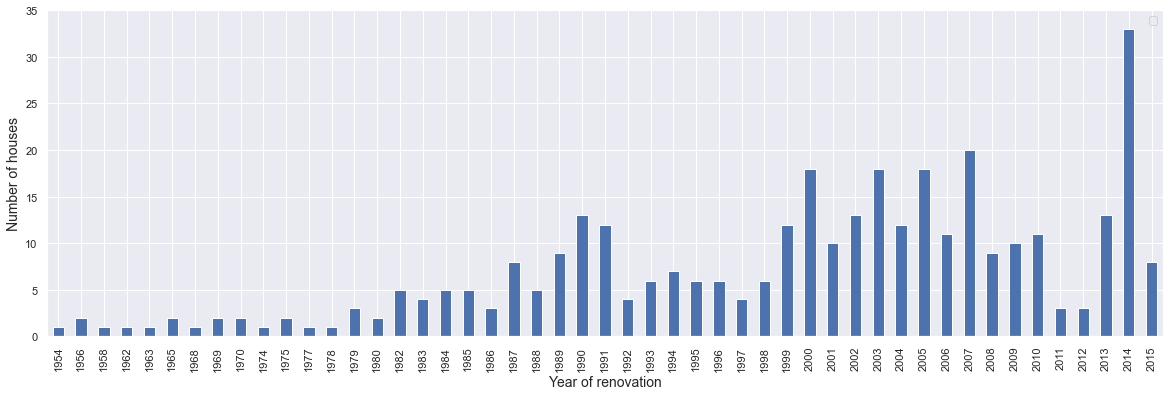

In [406]:
plt.figure(figsize=(105,5))
temp = high_priced_ren.groupby('yr_renovated').count()
temp.plot(y='id', kind='bar', figsize=(20, 6))
plt.ylim(0,35)
plt.xlabel('Year of renovation', fontsize=14)
plt.ylabel('Number of houses', fontsize=14)
plt.legend('')
#plt.figure(figsize=(35,5))

In [423]:
high_priced_ren.groupby('yr_built').count().reset_index().head()

yr_built  index  id  date  price  bedrooms  bathrooms  sqft_living  \
0      1900      4   4     4      4         4          4            4   
1      1901      1   1     1      1         1          1            1   
2      1902      1   1     1      1         1          1            1   
3      1904      2   2     2      2         2          2            2   
4      1905      9   9     9      9         9          9            9   

   sqft_lot  floors  ...  sqft_basement  yr_renovated  zipcode  lat  long  \
0         4       4  ...              4             4        4    4     4   
1         1       1  ...              1             1        1    1     1   
2         1       1  ...              1             1        1    1     1   
3         2       2  ...              2             2        2    2     2   
4         9       9  ...              9             9        9    9     9   

   sqft_living15  sqft_lot15  renovated  decade_renovated  decade_built  
0              4           4          4                 4             0  
1              1           1          1                 1             1  
2              1           1          1                 1             1  
3              2           2          2                 2             2  
4              9           9          9                 9             9  

[5 rows x 25 columns]

''

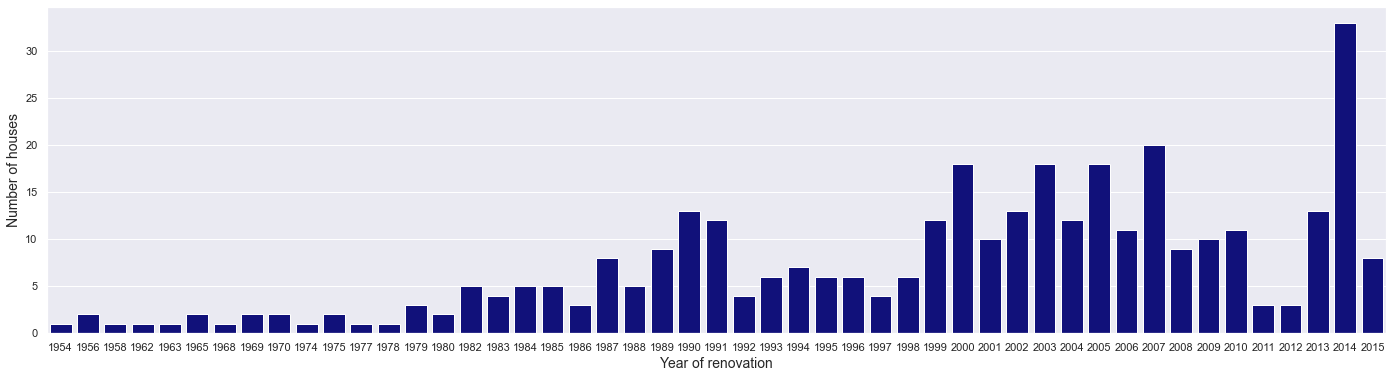

In [425]:
plot_data = high_priced_ren.groupby('yr_renovated').count().reset_index()

fig = plt.figure(figsize=(24,6))
ax = sns.barplot(x='yr_renovated', y='price', data=plot_data, color='darkblue')
ax.set_xlabel('Year of renovation', fontsize=14)
ax.set_ylabel('Number of houses', fontsize=14)
ax.set_xticks(ax.get_xticks(), rotation=90)
#ax.set_title('Average selling place over year of renovation', fontsize=16)
#ax.set_yticklabels(['0', '0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4'])
;

In [ ]:
fig, ax1 = plt.subplots(figsize=(16,10))
ax1.set_title('Timeperiode vs. Housesales vs. Price per house', fontsize=20)
ax1.set_xlabel('Date', fontsize=20)
ax1.set_ylabel('Avg Temp', fontsize=20, color=color)
ax2 = sns.barplot(x='date', y='count', data = top10_c_p, palette=['orangered' if (int(y)<60300000) else 'lightblue' for y in top10_c_p['price']])
for p in ax2.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=12,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('price per house', fontsize=20, color=color)
ax2 = sns.lineplot(x='date', y='price_house', data = top10_c_p, sort=False, color="black",linewidth=3)
ax2.tick_params(axis='y', color=color)
plt.show()

## bar plot for number of renovated houses for certain decades

In [ ]:
cut_labels = np.arange(1900, 2020, 10)
cut_bins = np.arange(1900, 2021, 10)
print(len(cut_labels), len(cut_bins))
high_priced_new['yr_built'] = high_priced_new.yr_built.apply(lambda y: int(y))
high_priced_new['decade_built'] = pd.cut(high_priced_new.yr_built, bins=cut_bins, labels=cut_labels)

''

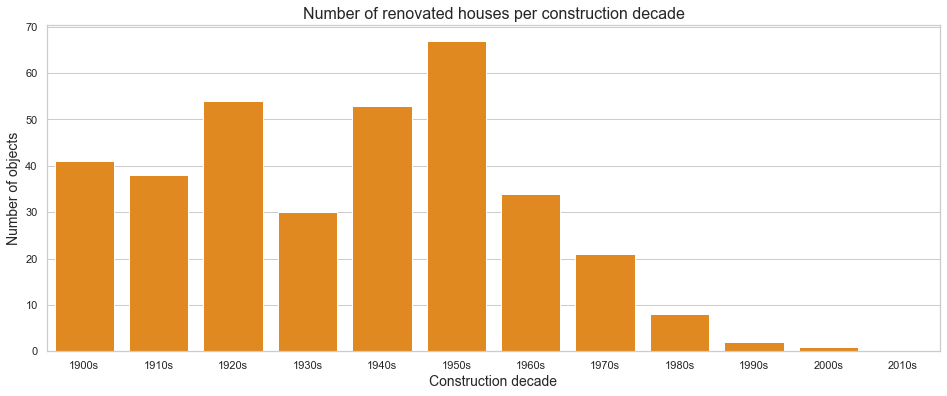

In [439]:
plotdata = high_priced_ren.groupby('decade_built').count().reset_index()


objects = plot_data.yr_built
y_pos = plot_data.price

# create colormap
rank = y_pos.argsort().argsort()
pal = sns.color_palette("Blues_d", len(y_pos))

# set size and style
#sns.set(style="whitegrid", color_codes=True, rc={'figure.figsize':(18.,5.)})

#ax = sns.barplot(objects, y_pos, palette=np.array(pal[::1])[rank])


fig = plt.figure(figsize=(16,6))

ax=sns.barplot(x='decade_built', y='price', data=plotdata, color='darkorange')

ax.set_xlabel('Construction decade', fontsize=14)
ax.set_ylabel('Number of objects', fontsize=14)
ax.set_title('Number of renovated houses per construction decade', fontsize=16)
#ax.set_yticklabels(['0', '0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4'])
ax.set_xticklabels(['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])
#plt.legend(loc='upper left', labels=['unrenovated', 'renovated'])
;

In [462]:
top10_c_p=high_priced

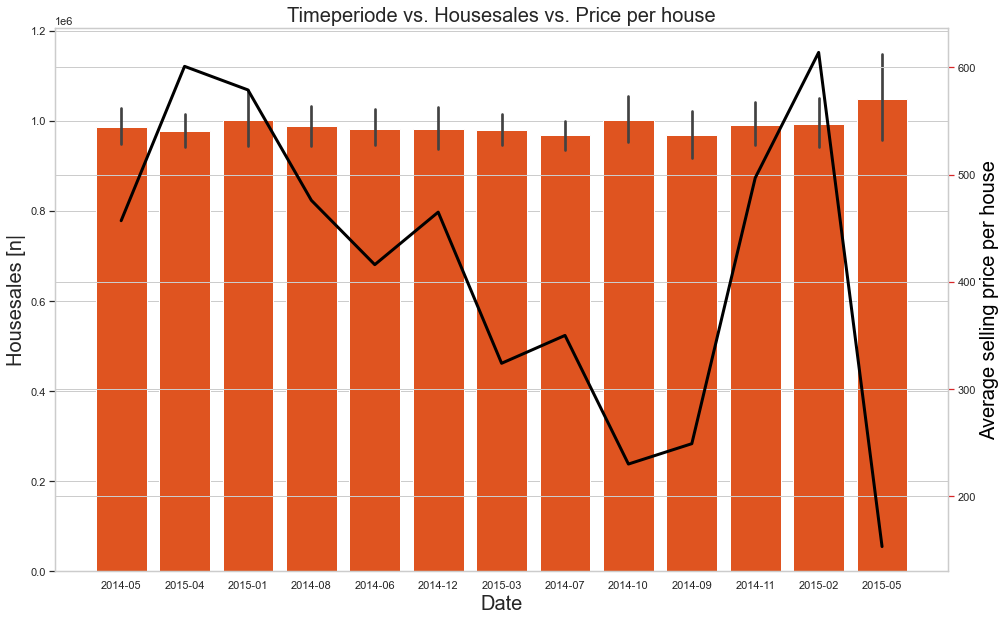

In [474]:
bar_plot_data = high_priced
line_plot_data = high_priced.groupby('date').count().reset_index()

fig, ax1 = plt.subplots(figsize=(16,10))
ax1.set_title('Timeperiode vs. Housesales vs. Price per house', fontsize=20)
ax2 = sns.barplot(x='date', y='price', data = bar_plot_data, palette=['orangered' if (int(y)<60300000) else 'lightblue' for y in bar_plot_data['price']])
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average selling price per house', fontsize=20, color="black")
ax2 = sns.lineplot(x='date', y='price', data = line_plot_data, sort=False, color="black",linewidth=3)
ax1.set_xlabel('Date', fontsize=20)
ax1.set_ylabel('Housesales [n|', fontsize=20)
ax1.tick_params(axis='y')
ax2.tick_params(axis='y', color=color)
#plt.xlim('2014-04', '2015-5')
#ax1.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

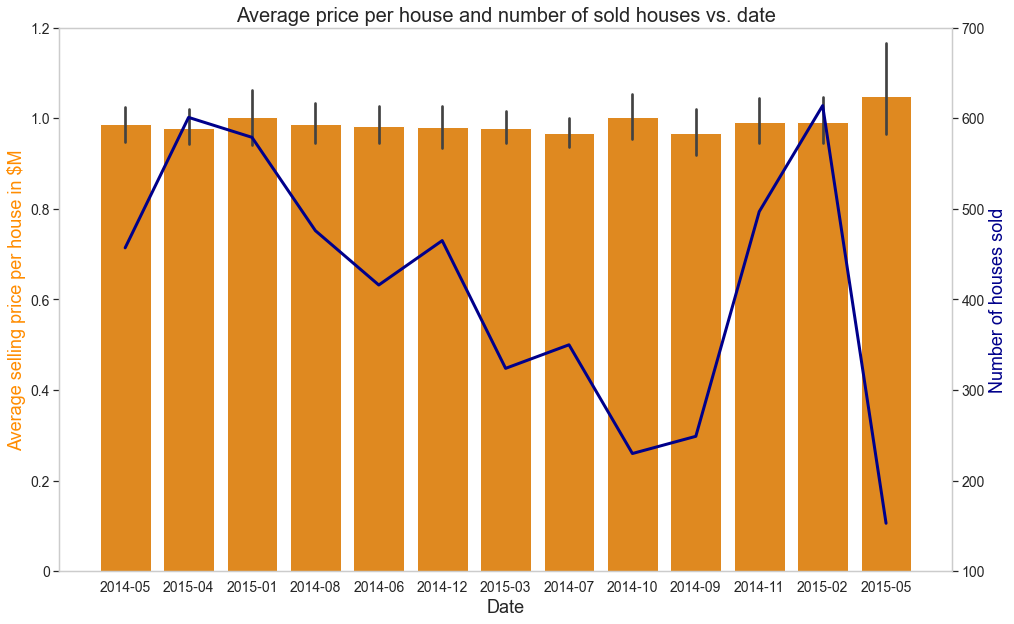

In [499]:
bar_plot_data = high_priced
line_plot_data = high_priced.groupby('date').count().reset_index()

fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Average price per house and number of sold houses vs. date', fontsize=20)
ax1 = sns.barplot(x='date', y='price', data = bar_plot_data, palette=['darkorange' if (int(y)<60300000) else 'lightblue' for y in bar_plot_data['price']])
ax2 = ax1.twinx()
color = 'tab:red'
ax1.set_ylabel('Average selling price per house in $M', fontsize=18, color="darkorange")
ax2 = sns.lineplot(x='date', y='price', data = line_plot_data, sort=False, color="darkblue",linewidth=3)
ax1.set_xlabel('Date', fontsize=18)
ax2.set_ylabel('Number of houses sold', fontsize=18, color='darkblue')
ax1.grid(False)
ax2.grid(False)
ax1.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0', '1.2'], fontsize=14)
ax1.set_ylim(0, 1200000)
ax2.set_yticklabels(['100', '200', '300', '400', '500', '600', '700'], fontsize=14)
ax2.set_ylim(100,700)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=14)

#ax1.tick_params(axis='y')
#ax2.tick_params(axis='y', color=color)
#plt.xlim('2014-04', '2015-5')
#ax1.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()